## import & load

In [19]:
import pandas as pd
import numpy as np
import sys
import requests
import pprint

import datetime
import pytz
import importlib
import matplotlib.pyplot as plt

from collections import defaultdict
import datetime, json, math
from google.cloud import bigquery
from numpy_ext import rolling_apply as rolling_apply_ext

In [20]:
import os

if os.path.exists('credential.json'):
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = os.path.join(os.getcwd(), 'credential.json')

In [21]:
import data.read
importlib.reload(data.read)

<module 'data.read' from '/home/junlim/projects/jitter_recovery/data/read.py'>

In [22]:
df = data.read.df_okx_20231216_1231
df_close = df.pivot(index='timestamp', columns='symbol', values='close')
dfi = df.set_index(['timestamp', 'symbol'])
all_symbols = df.symbol.unique()

In [23]:
df.tail(3)

,timestamp,symbol,open,high,low,close,volume
3953359,2023-12-31 04:58:00,CSPR-USDT-SWAP,0.04951,0.04951,0.04947,0.04947,41425.0
3953360,2023-12-31 04:58:00,STX-USDT-SWAP,1.43480,1.43500,1.43380,1.43380,3650.0
3953361,2023-12-31 04:58:00,THETA-USDT-SWAP,1.24600,1.24600,1.24600,1.24600,570.0


In [24]:
len([s for s in all_symbols if 'USDT' in s])

157

## multiple symbols

In [25]:
import algo.jitter_recovery.calculate
importlib.reload(algo.jitter_recovery.calculate)
import algo.jitter_recovery.research
importlib.reload(algo.jitter_recovery.research)

<module 'algo.jitter_recovery.research' from '/home/junlim/projects/jitter_recovery/algo/jitter_recovery/research.py'>

In [26]:
jitter_recovery_feature_param = algo.jitter_recovery.calculate.JitterRecoveryFeatureParam(240)
jitter_recovery_trading_param = algo.jitter_recovery.calculate.JitterRecoveryTradingParam(
    jitter_recovery_feature_param, 
    0.40, -0.10, 0.05, is_long_term=True)

In [27]:
dfst_feature_approximate, dfst_feature, dfst_trading = algo.jitter_recovery.research.get_dfsts(df, jitter_recovery_trading_param)

0 symbol: WLD-USDT-SWAP: 29 (approx)
1 symbol: STX-USDT-SWAP: 0 (approx)
2 symbol: DYDX-USDT-SWAP: 0 (approx)
3 symbol: WAVES-USDT-SWAP: 0 (approx)
4 symbol: GFT-USDT-SWAP: 0 (approx)
5 symbol: CHZ-USDT-SWAP: 0 (approx)
6 symbol: XMR-USDT-SWAP: 0 (approx)
7 symbol: API3-USDT-SWAP: 0 (approx)
8 symbol: ARB-USDT-SWAP: 0 (approx)
9 symbol: BCH-USDT-SWAP: 0 (approx)
10 symbol: USDC-USDT-SWAP: 0 (approx)
11 symbol: MATIC-USDT-SWAP: 0 (approx)
12 symbol: FET-USDT-SWAP: 0 (approx)
13 symbol: SLP-USDT-SWAP: 0 (approx)
14 symbol: GALA-USDT-SWAP: 0 (approx)
15 symbol: FTM-USDT-SWAP: 0 (approx)
16 symbol: MKR-USDT-SWAP: 0 (approx)
17 symbol: GAS-USDT-SWAP: 0 (approx)
18 symbol: VRA-USDT-SWAP: 0 (approx)
19 symbol: CETUS-USDT-SWAP: 0 (approx)
20 symbol: AAVE-USDT-SWAP: 0 (approx)
21 symbol: FITFI-USDT-SWAP: 0 (approx)
22 symbol: WOO-USDT-SWAP: 0 (approx)
23 symbol: TON-USDT-SWAP: 0 (approx)
24 symbol: WSM-USDT-SWAP: 0 (approx)
25 symbol: CEL-USDT-SWAP: 0 (approx)
26 symbol: BAT-USDT-SWAP: 0 (appro

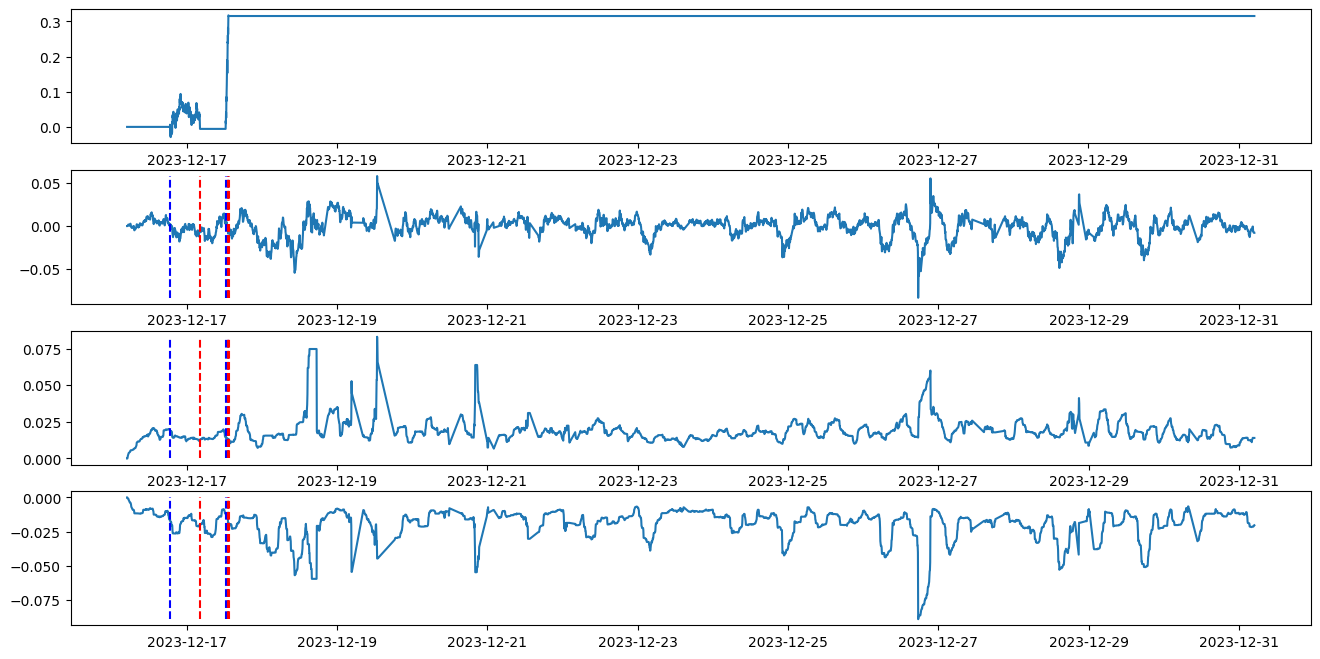

In [28]:
algo.jitter_recovery.research.investigate_trading(dfst_feature_approximate, dfst_trading)

<Axes: xlabel='timestamp'>

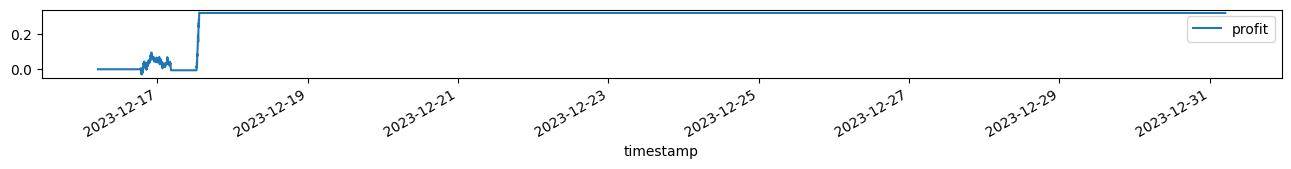

In [23]:
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(16,1))

In [24]:
dfst_trading[dfst_trading.profit != 0].dropna()[['profit']].groupby('symbol').sum().sort_values('profit')

,profit
symbol,
WLD-USDT-SWAP,-0.005682
ALPHA-USDT-SWAP,0.320987


In [25]:
for _, row in dfst_trading[(dfst_trading.position_changed != 0)].dropna().reset_index().sort_values('timestamp').iterrows():
    print(f'{row["timestamp"]}, {row["symbol"]}, {row["value"]}, position_changed: {row["position_changed"]}')

2023-12-16 18:40:00, WLD-USDT-SWAP, 4.009, position_changed: 1.0
2023-12-17 04:16:00, WLD-USDT-SWAP, 4.007, position_changed: -1.0
2023-12-17 12:28:00, ALPHA-USDT-SWAP, 0.2234, position_changed: 1.0
2023-12-17 13:21:00, ALPHA-USDT-SWAP, 0.1609, position_changed: -1.0
2023-12-17 13:22:00, ALPHA-USDT-SWAP, 0.1619, position_changed: 1.0
2023-12-17 13:23:00, ALPHA-USDT-SWAP, 0.1622, position_changed: -1.0


## single symobl

In [47]:
import algo.jitter_recovery.calculate
importlib.reload(algo.jitter_recovery.calculate)
import algo.jitter_recovery.research
importlib.reload(algo.jitter_recovery.research)

<module 'algo.jitter_recovery.research' from '/home/junlim/projects/jitter_recovery/algo/jitter_recovery/research.py'>

In [48]:
symbol_investigate = 'ALPHA-USDT-SWAP'
dfs = dfi.xs(symbol_investigate, level=1)

In [49]:
jitter_recovery_trading_param = algo.jitter_recovery.calculate.JitterRecoveryTradingParam(
    algo.jitter_recovery.calculate.JitterRecoveryFeatureParam(240), 
    0.40, -0.10, 0.05, is_long_term=True)

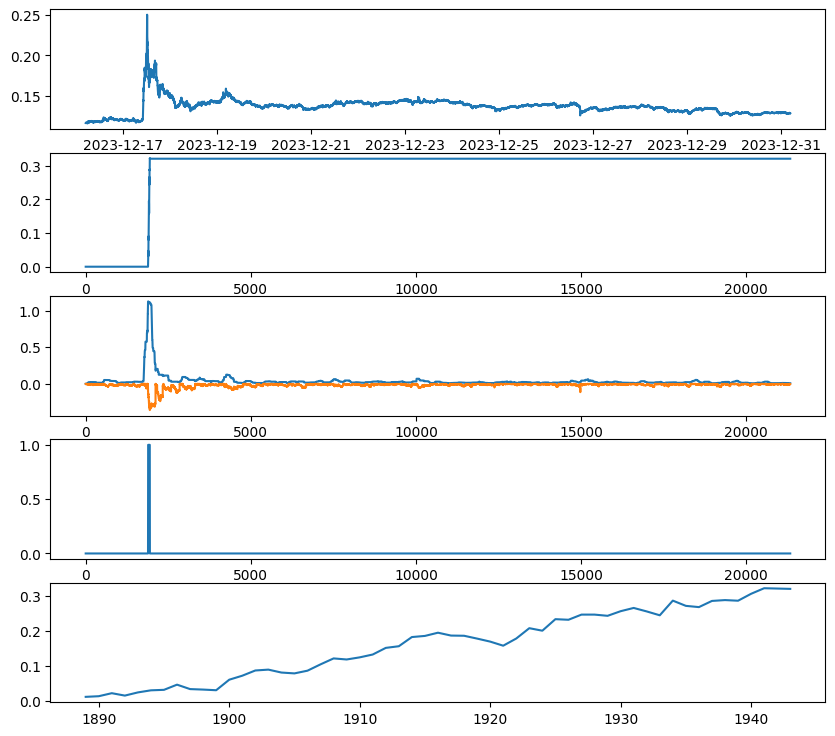

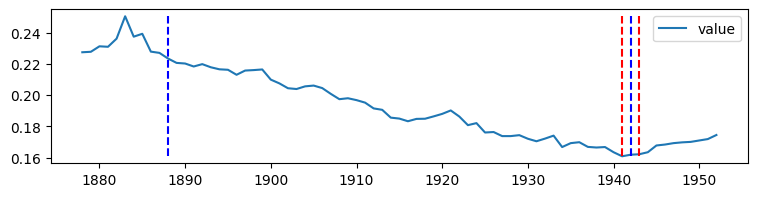

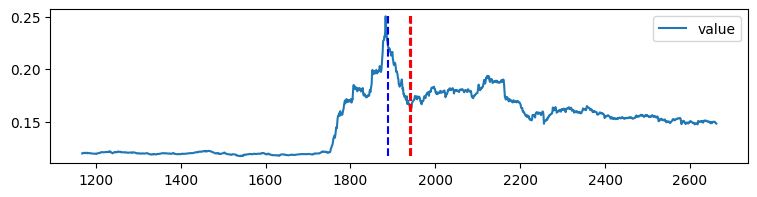

In [50]:
df_feature, df_trading = algo.jitter_recovery.research.investigate_symbol(df, symbol_investigate, jitter_recovery_trading_param, figsize=(10,9))

In [32]:
df_trading[
    (df_trading.index >=  '2024-01-03 12:14:00') &
    (df_trading.index <=  '2024-01-03 12:18:00')
]

,value,ch_max,ch_min,v_ch_max_is_from,v_ch_min_is_from,v_ch_max_is_to,v_ch_min_is_to,ch_since_max,ch_since_min,distance_max_ch,distance_min_ch,in_position,value_at_enter,position_changed,lowest_since_enter,timedelta_since_position_enter,ch_from_enter,ch_from_lowest_since_enter,profit_raw,profit
timestamp,,,,,,,,,,,,,,,,,,,,


In [33]:
df_trading[(df_trading.position_changed != 0)][['value', 'in_position', 'position_changed', 'profit_raw', 'profit']].dropna()

,value,in_position,position_changed,profit_raw,profit
timestamp,,,,,
2023-12-17 12:28:00,0.2234,1,1.0,0.0000,0.000000
2023-12-17 13:21:00,0.1609,0,-1.0,0.0026,0.015902
2023-12-17 13:22:00,0.1619,1,1.0,-0.0000,-0.000000
2023-12-17 13:23:00,0.1622,0,-1.0,-0.0003,-0.001853


In [34]:
for _, row in dfst_trading[(dfst_trading.position_changed != 0)].dropna().reset_index().sort_values('timestamp').iterrows():
    if row['symbol'] != symbol_investigate: continue
    print(f'{row["timestamp"]}, {row["symbol"]}, {row["value"]}, position_changed: {row["position_changed"]}')

2023-12-17 12:28:00, ALPHA-USDT-SWAP, 0.2234, position_changed: 1.0
2023-12-17 13:21:00, ALPHA-USDT-SWAP, 0.1609, position_changed: -1.0
2023-12-17 13:22:00, ALPHA-USDT-SWAP, 0.1619, position_changed: 1.0
2023-12-17 13:23:00, ALPHA-USDT-SWAP, 0.1622, position_changed: -1.0
